In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Mission 1 : Explorer les Données (Débutant)

In [109]:
#1. Charger les données et afficher les 5 premières lignes.
data = pd.read_csv('game_data_complete.csv')
data.head()

,Date,ID_Joueur,Temps_Jeu,Victoires,Achats_Objets,Satisfaction,Région,Serveur,Latitude,Longitude
0,2023-01-07,1943,100.913289,1,0,71.3,OC,Stable,30.432320,96.947262
1,2023-01-20,1943,103.048186,1,50,75.9,EU,Stable,5.541137,-89.395196
2,2023-01-29,1943,176.132234,1,50,86.4,AS,Stable,-54.947640,-37.501899
3,2023-01-15,1943,94.473477,0,0,94.6,AF,Stable,-66.108038,-162.469859
4,2023-01-11,1943,193.236652,3,50,55.9,AF,Stable,-34.836281,-134.227974


In [110]:
#2. Identifier les colonnes avec des valeurs manquantes et leur proportion.
data.isna().mean()

Date             0.0000
ID_Joueur        0.0000
Temps_Jeu        0.0500
Victoires        0.0000
Achats_Objets    0.0000
Satisfaction     0.0500
Région           0.2116
Serveur          0.0000
Latitude         0.0000
Longitude        0.0000
dtype: float64

In [111]:
#3. Compter le nombre unique de joueurs.
data['ID_Joueur'].unique().shape[0]

500

In [112]:
#1. Vérifiez les statistiques globales (moyennes, valeurs minimales et maximales).
data.describe()

,ID_Joueur,Temps_Jeu,Victoires,Achats_Objets,Satisfaction,Latitude,Longitude
count,15000.000000,14250.000000,15000.000000,15000.000000,14250.000000,15000.000000,15000.000000
mean,1494.598000,120.235668,1.139267,54.273333,75.008926,0.142723,-0.623209
std,291.007357,30.038566,1.059975,112.281992,14.321214,52.012019,103.976793
min,1001.000000,30.000000,0.000000,0.000000,50.000000,-89.958798,-179.912479
25%,1234.750000,99.957081,0.000000,0.000000,62.800000,-45.112024,-91.142225
50%,1501.500000,120.196449,1.000000,0.000000,75.000000,0.531799,-0.668055
75%,1741.750000,140.641696,2.000000,50.000000,87.500000,44.547058,89.220585
max,1999.000000,254.372528,4.000000,500.000000,100.000000,89.985052,179.970215


In [113]:
#2. Trouvez les jours où les serveurs sont hors ligne.
data['Date'] = pd.to_datetime(data['Date'])
dates_hors_lignes = data.loc[data["Serveur"]=='Hors-Ligne',"Date"].unique()
dates_hors_lignes = pd.to_datetime(pd.Series(dates_hors_lignes))
dates_hors_lignes = dates_hors_lignes.astype('datetime64[ns]')

In [114]:
#3. Filtrez les données pour ces jours et analysez leur impact sur les achats.
data.loc[data['Date'].isin(dates_hors_lignes),'Achats_Objets'].value_counts()

Achats_Objets
0      8952
50     3084
100    1501
200     739
500     724
Name: count, dtype: int64

Mission 2 : Analyse des Joueurs Actifs (Intermédiaire)

In [116]:
#1. Calculer le temps total de jeu par joueur.
temps_par_joueur = data.groupby(by='ID_Joueur')["Temps_Jeu"].sum().sort_values(ascending=False).reset_index()
temps_par_joueur

,ID_Joueur,Temps_Jeu
0,1561,3995.501446
1,1517,3976.710036
2,1695,3974.456850
3,1483,3943.158482
4,1578,3907.477029
...,...,...
495,1168,2848.666502
496,1892,2828.083004
497,1526,2806.233993
498,1783,2777.763587


In [117]:
#2. Afficher les 5 joueurs les plus actifs.
temps_par_joueur.head()

,ID_Joueur,Temps_Jeu
0,1561,3995.501446
1,1517,3976.710036
2,1695,3974.456850
3,1483,3943.158482
4,1578,3907.477029


In [118]:
#3. Identifier les joueurs ayant une satisfaction inférieure à 60.
moyenne_satisfaction = data.groupby(by='ID_Joueur')["Satisfaction"].mean()
joueurs_insatisfaits = moyenne_satisfaction[moyenne_satisfaction < 60].reset_index()
joueurs_insatisfaits

,ID_Joueur,Satisfaction


In [119]:
#Créez un top 10 des joueurs les plus actifs 

top_10 = temps_par_joueur.head(10).reset_index()
top_10.index += 1
top_10.head()

,index,ID_Joueur,Temps_Jeu
1,0,1561,3995.501446
2,1,1517,3976.710036
3,2,1695,3974.456850
4,3,1483,3943.158482
5,4,1578,3907.477029


In [120]:
#ajoutez une nouvelle colonne Statut :
#1. "VIP" pour les joueurs très actifs (> 4000 minutes de jeu).
#2. "Risque" pour les joueurs insatisfaits (< 60 de satisfaction).
data["Statut"] = "Normal"
data.loc[temps_par_joueur.loc[temps_par_joueur['Temps_Jeu']>4000,"ID_Joueur"],"Status"] = "VIP"
data.loc[joueurs_insatisfaits.loc[:,"ID_Joueur"],"ID_Joueur"] = "Risque"

Mission 3 : Visualisation des Performances Régionales (Avancé)

In [122]:
#remplissage des valeures nulles
print(data["Région"].isna().mean())
#on remarque que 21% des lignes ne possedent pas de region donc on les remplace avec autre valeurs
data["Région"] = data["Région"].fillna('AUTRE')

0.2116


In [123]:
#1. Créez un graphique des ventes totales d’objets par région.
ventes_par_region = data.groupby(by='Région')["Achats_Objets"].sum()
ventes_par_region = ventes_par_region.reset_index()
ventes_par_region

,Région,Achats_Objets
0,AF,137700
1,AS,127300
2,AUTRE,168100
3,EU,132300
4,OC,122700
5,SA,126000


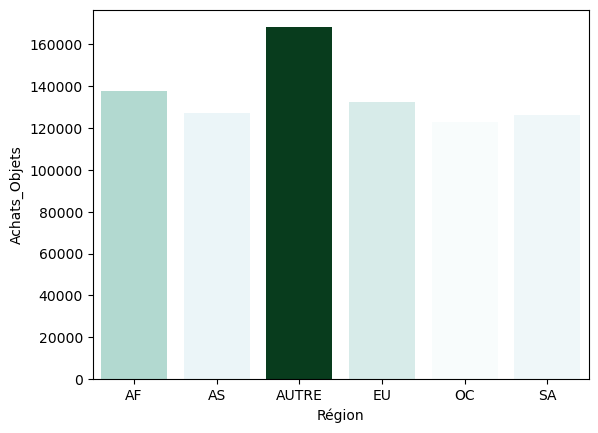

In [124]:
sns.barplot(x='Région', y='Achats_Objets', data=ventes_par_region,hue='Achats_Objets',palette='BuGn')
plt.legend([],[], frameon=False)
plt.show()

In [125]:
#Représentez les performances des serveurs par région (stable, dégradé, hors ligne).
serveur_par_region = data.groupby(by=['Région', 'Serveur']).size().reset_index(name='Count')

<Axes: xlabel='Région', ylabel='Count'>

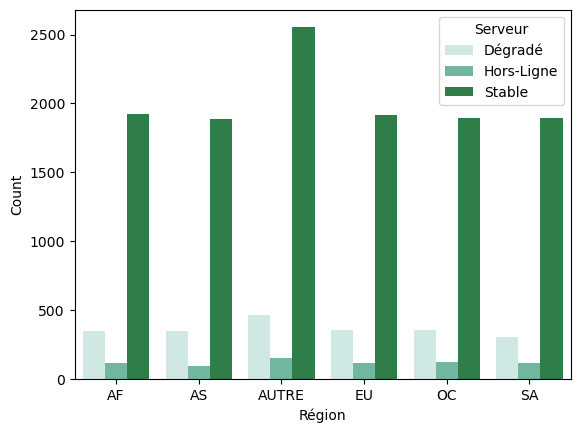

In [126]:
sns.barplot(x='Région', y='Count', hue='Serveur', data=serveur_par_region, palette='BuGn')

In [127]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [172]:
import folium
import pandas as pd

# Example DataFrame (replace this with your data)
carte_data = pd.DataFrame({
    'Région': ['AF', 'AS', 'EU', 'OC', 'SA'],
    'Achats_Objets': [137700, 127300, 132300, 122700, 126000],
    'Latitude': [10, 40, 50, -30, -20],
    'Longitude': [20, 80, 10, 150, -60]
})

# Create a Folium map centered at average coordinates
carte = folium.Map(
    location=[carte_data['Latitude'].mean(), carte_data['Longitude'].mean()],
    zoom_start=2, tiles='OpenStreetMap'
)

# Add points to the map
for _, row in carte_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Achats_Objets'] / 10000,  # Adjust size
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Région: {row['Région']}<br>Achats Moyens: {row['Achats_Objets']}"
    ).add_to(carte)

# Show the map
carte

Mission 4 : Prédiction des Dépenses

In [130]:
#on verifie les valeures nulles
print(data.isna().sum())
#on remplis les valeures nulles 
data[["Temps_Jeu", "Satisfaction"]] = data[["Temps_Jeu", "Satisfaction"]].fillna(data[["Temps_Jeu", "Satisfaction"]].median())

Date                 0
ID_Joueur            0
Temps_Jeu          750
Victoires            0
Achats_Objets        0
Satisfaction       750
Région               0
Serveur              0
Latitude             0
Longitude            0
Statut               0
Status           15000
dtype: int64


In [131]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

# split data
X_train, X_test, y_train, y_test = train_test_split(data[["Temps_Jeu", "Victoires"]], data["Achats_Objets"], test_size=0.2, random_state=42)

# fit model 
model.fit(X_train, y_train)

# make predictionsx
y_pred = model.predict(X_test)

# evaluate error
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

MAE 66.68643074843757
MSE 12524.726945506563


In [132]:
#Arbre de Décision
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)

# split data
X_train, X_test, y_train, y_test = train_test_split(data[["Temps_Jeu", "Victoires"]], data["Achats_Objets"], test_size=0.2, random_state=42)

# fit model 
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate error
print("MAE:", mean_absolute_error(y_test, y_pred))  # Mean Absolute Error
print("MSE:", mean_squared_error(y_test, y_pred))  # Mean Squared Error

MAE: 75.91167325608512
MSE: 15966.432093303718


In [133]:
#SVM
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# split data
X_train, X_test, y_train, y_test = train_test_split(data[["Temps_Jeu", "Victoires"]], data["Achats_Objets"], test_size=0.2, random_state=42)

# fit model 
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate error
print("MAE:", mean_absolute_error(y_test, y_pred))  # Mean Absolute Error
print("MSE:", mean_squared_error(y_test, y_pred))  # Mean Squared Error

MAE: 54.422259057389
MSE: 15462.453960634912


In [134]:
#Le modèle le plus performant est le SVM

Mission 5 : Détection d’Anomalies

In [180]:
import pandas as pd

# 1. Calcul des quartiles Q1 et Q3
Q1_temp = data["Temps_Jeu"].quantile(0.25)
Q3_temp = data["Temps_Jeu"].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp

Q1_vic = data["Victoires"].quantile(0.25)
Q3_vic = data["Victoires"].quantile(0.75)
IQR_vic = Q3_vic - Q1_vic

# 2. Définition des limites pour les valeurs aberrantes (outliers)
outlier_lower_temp = Q1_temp - 1.5 * IQR_temp
outlier_upper_temp = Q3_temp + 1.5 * IQR_temp

outlier_lower_vic = Q1_vic - 1.5 * IQR_vic
outlier_upper_vic = Q3_vic + 1.5 * IQR_vic

# 3. Identifier les outliers en fonction des quantiles
outliers_temp = data[(data["Temps_Jeu"] < outlier_lower_temp) | (data["Temps_Jeu"] > outlier_upper_temp)]
outliers_vic = data[(data["Victoires"] < outlier_lower_vic) | (data["Victoires"] > outlier_upper_vic)]

# 4. Affichage des résultats
print("Valeurs aberrantes pour Temps_Jeu (en dehors de l'intervalle interquartile) :")
print(outliers_temp[["ID_Joueur", "Temps_Jeu"]])

print("\nValeurs aberrantes pour Victoires (en dehors de l'intervalle interquartile) :")
print(outliers_vic[["ID_Joueur", "Victoires"]])

# Optionnel: Vous pouvez combiner les deux DataFrames d'outliers pour une vue d'ensemble
all_outliers = pd.concat([outliers_temp[["ID_Joueur", "Temps_Jeu"]],
                          outliers_vic[["ID_Joueur", "Victoires"]]], axis=1)

Valeurs aberrantes pour Temps_Jeu (en dehors de l'intervalle interquartile) :
       ID_Joueur   Temps_Jeu
77          1653  196.815089
118         1182  200.007157
256         1772  201.323829
300         1129   30.000000
307         1129   40.445158
...          ...         ...
14130       1156   39.291731
14181       1705   43.619848
14214       1040   36.744346
14581       1787   30.000000
14780       1107  228.340502

[164 rows x 2 columns]

Valeurs aberrantes pour Victoires (en dehors de l'intervalle interquartile) :
Empty DataFrame
Columns: [ID_Joueur, Victoires]
Index: []


Mission 6 : Optimisation de l’Économie Virtuelle

In [138]:
#1. Identifiez les joueurs qui dépensent régulièrement et ceux qui ne dépensent pas.
frequence_achats = data.groupby('ID_Joueur').agg(
    Total_Achats=('Achats_Objets', 'sum'),   # Montant total dépensé
    Nb_Achats=('Achats_Objets', 'count'),   # Nombre total d'achats
    Dernier_Achat=('Date', 'max')           # Dernière date d'achat
).reset_index()

frequence_achats['Categorie_Joueur'] = pd.cut(
    frequence_achats['Nb_Achats'], 
    bins=[0, 1, 5, 20, float("inf")], 
    labels=['Non Dépensant', 'Occasionnel', 'Régulier', 'Fidèle']
)
print(frequence_achats.head())

   ID_Joueur  Total_Achats  Nb_Achats Dernier_Achat Categorie_Joueur
0       1001          1300         30    2023-01-30           Fidèle
1       1002          1700         30    2023-01-30           Fidèle
2       1003          1500         30    2023-01-27           Fidèle
3       1005          1050         30    2023-01-30           Fidèle
4       1006          1800         30    2023-01-29           Fidèle


In [139]:
#2. Préparez une segmentation en fonction des habitudes d’achat.
date_ref = pd.to_datetime(data['Date']).max() + pd.Timedelta(days=1)
def calcul_recence(serie):
    return (date_ref - pd.to_datetime(serie.max())).days

rfm = data.groupby('ID_Joueur').agg(
    Recence=('Date', calcul_recence),         # Dernier achat
    Frequence=('ID_Joueur', 'count'),         # Nombre d'achats
    Montant_Total=('Achats_Objets', 'sum')    # Total dépensé
).reset_index()

print(rfm.head())

   ID_Joueur  Recence  Frequence  Montant_Total
0       1001        1         30           1300
1       1002        1         30           1700
2       1003        4         30           1500
3       1005        1         30           1050
4       1006        2         30           1800


| **Segment**      | **Description**            | **Action Recommandée**              |
|-------------------|------------------------------|--------------------------------------|
| **Premium**        | Clients récents et actifs   | Offres exclusives et programmes VIP |
| **Fidèle**         | Bons clients, mais moins récents | Remises fidélité et bonus de retour |
| **Potentiel**      | Dépenses modérées           | Promotions ciblées et campagnes spéciales |
| **À Risque**       | Inactifs ou faibles dépenses | Offres de réengagement et cadeaux   |
